In [2]:
import sklearn
from sklearn import metrics
import numpy as np
import pickle
import os
from tensorflow import keras
import matplotlib.pyplot as plt


## Preparing Data
60% training, 20% validation, and 20% testing

In [3]:
# TODO: Move these two functions to a shared file for helper functions
def unPickleData(filename):
  with open(filename,'rb') as f: arr = pickle.load(f)
  return arr

def getDataPath(dirname,filename):
  return os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir)),"processed_data", dirname,filename)

x_data = unPickleData(getDataPath("posts","X_posts_sub.pkl"))
y_data = unPickleData(getDataPath("posts","Y_posts_sub.pkl"))

n = len(x_data)
x_data_training = x_data[:int(0.6*n)]
x_data_validation = x_data[int(0.6*n):int(0.8*n)]
x_data_testing = x_data[int(0.8*n):]

y_data_training = np.array(y_data[:int(0.6*n)])
y_data_validation = np.array(y_data[int(0.6*n):int(0.8*n)])
y_data_testing = np.array(y_data[int(0.8*n):])

## Training

In [4]:
model = keras.Sequential([keras.layers.Flatten(),
                keras.layers.Dense(128,activation = "relu"),                          
                keras.layers.Dense(1,activation = "sigmoid")])
                
model.add(keras.layers.Dropout(0.5))
model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics =['accuracy'])

history = model.fit(x_data_training, y_data_training,epochs = 100, validation_data=(x_data_validation,y_data_validation))


Epoch 1/100
28/28 [==============================] - 1s 10ms/step - loss: 3.2370 - accuracy: 0.5268 - val_loss: 0.6385 - val_accuracy: 0.7295
Epoch 2/100
28/28 [==============================] - 0s 3ms/step - loss: 2.5802 - accuracy: 0.5393 - val_loss: 0.6004 - val_accuracy: 0.7500
Epoch 3/100
28/28 [==============================] - 0s 3ms/step - loss: 2.6651 - accuracy: 0.5040 - val_loss: 0.5644 - val_accuracy: 0.7671
Epoch 4/100
28/28 [==============================] - 0s 3ms/step - loss: 2.5260 - accuracy: 0.5029 - val_loss: 0.5292 - val_accuracy: 0.7877
Epoch 5/100
28/28 [==============================] - 0s 3ms/step - loss: 2.4252 - accuracy: 0.5621 - val_loss: 0.4969 - val_accuracy: 0.7979
Epoch 6/100
28/28 [==============================] - 0s 3ms/step - loss: 2.2469 - accuracy: 0.6180 - val_loss: 0.4667 - val_accuracy: 0.8048
Epoch 7/100
28/28 [==============================] - 0s 3ms/step - loss: 2.5550 - accuracy: 0.6921 - val_loss: 0.4435 - val_accuracy: 0.8219
Epoch 8/100


## Learning Curve

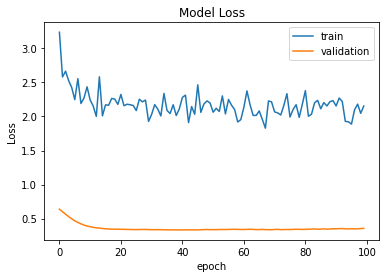

In [5]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## Testing

In [6]:
y_pred = model.predict(x_data_testing)
y_pred = [1 if (d > 0.5) else 0 for d in y_pred]

print(sklearn.metrics.classification_report(y_data_testing,y_pred))
print("Accuracy: ", sklearn.metrics.accuracy_score(y_data_testing, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       218
           1       0.98      0.61      0.75        75

    accuracy                           0.90       293
   macro avg       0.93      0.80      0.84       293
weighted avg       0.91      0.90      0.89       293

Accuracy:  0.8976109215017065
